# Imports

In [1]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

# Dataset

In [4]:
# Read dataset
df = pd.read_csv('Datasets/Pokemon.csv', 
                 index_col=0, 
                 encoding = "ISO-8859-1",
                 sep=';',
                 decimal=','
                )

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [6]:
# Display first 5 observations
print('%d rows and %d columns' % df.shape)

151 rows and 12 columns


In [7]:
print(*df.columns, sep='\n')

Name
Type 1
Type 2
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed
Stage
Legendary


In [8]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Scatter Plot

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


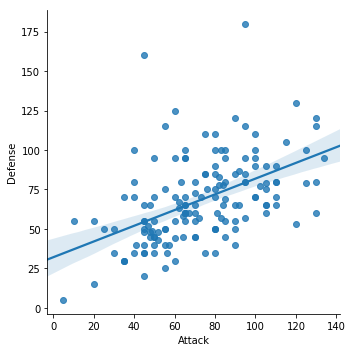

In [9]:
# Recommended way
sns.lmplot(data=df, x='Attack', y='Defense')

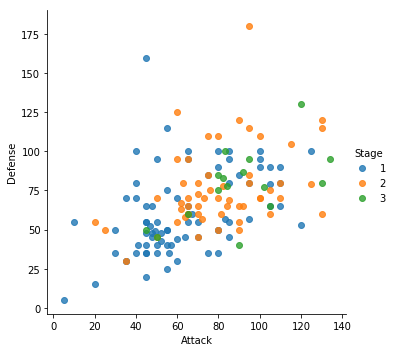

In [10]:
# Recommended way
sns.lmplot(data=df, x='Attack', y='Defense',
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0, 141.9881096001028)

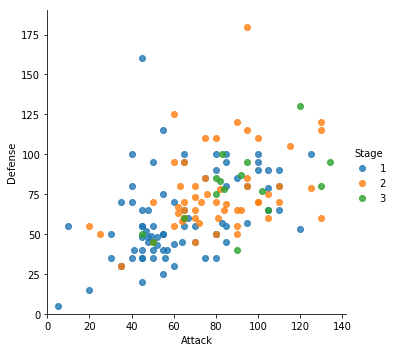

In [11]:
# Recommended way
sns.lmplot(data=df, x='Attack', y='Defense',
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# Box plot

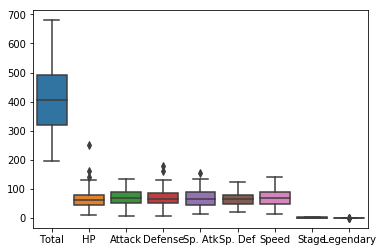

In [12]:
# Boxplot
sns.boxplot(data=df)

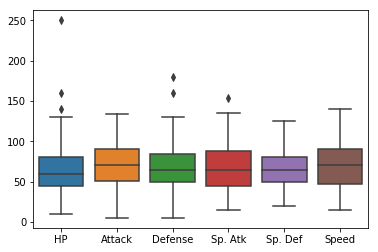

In [13]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# Boxplot
sns.boxplot(data=stats_df)

# Violin plots

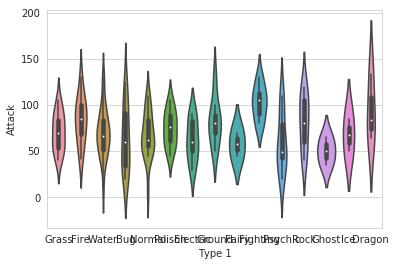

In [14]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(data=df, x='Type 1', y='Attack')

# Color palette

In [15]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

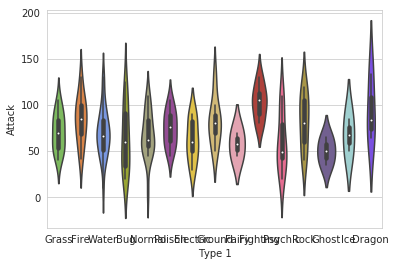

In [16]:
# Violin plot with Pokemon color palette
sns.violinplot(data=df, x='Type 1', y='Attack',               
               palette=pkmn_type_colors) # Set color palette

# swarm plot 

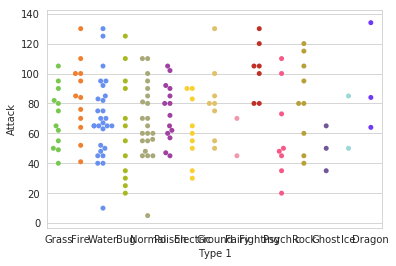

In [17]:
# Swarm plot with Pokemon color palette
sns.swarmplot(data=df, x='Type 1', y='Attack',
              palette=pkmn_type_colors)

# Overlaying swarm and violin plots

Text(0.5, 1.0, 'Attack by Type')

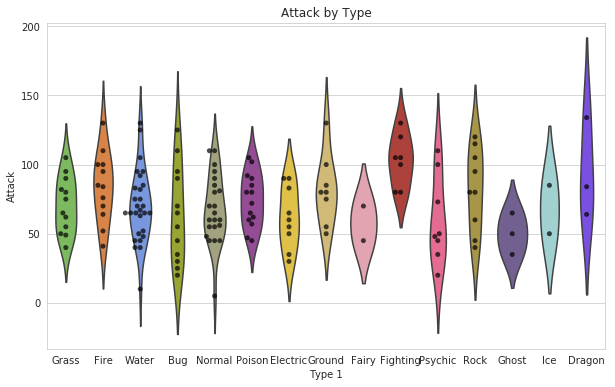

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(data=df, 
               x='Type 1',
               y='Attack', 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(data=df, 
              x='Type 1', 
              y='Attack', 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# Data wrangling

In [19]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

print( stats_df.shape )
print( melted_df.shape )
melted_df.head()

(151, 9)
(906, 5)


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


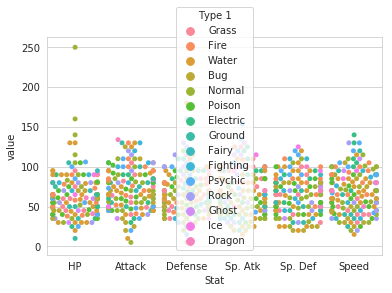

In [21]:
# Swarmplot with melted_df
sns.swarmplot(data=melted_df, x='Stat', y='value', 
              hue='Type 1')

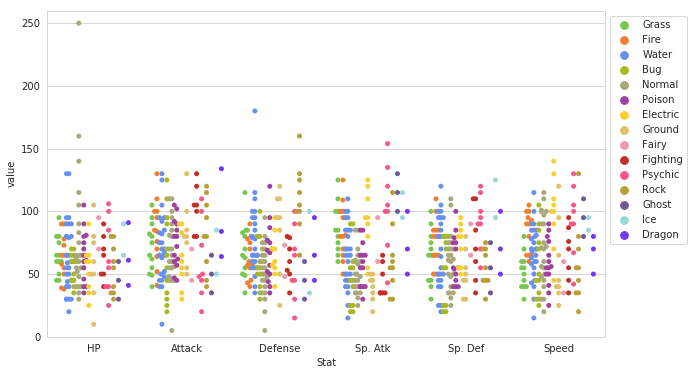

In [22]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(data=melted_df, 
              x='Stat', 
              y='value', 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Heatmap

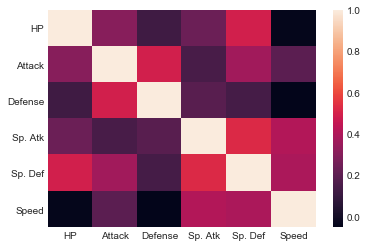

In [20]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

# Histgram

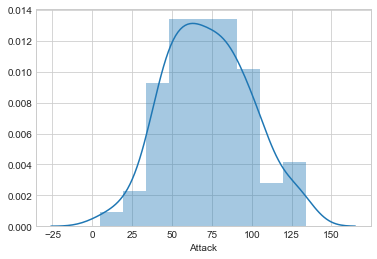

In [21]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

# Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

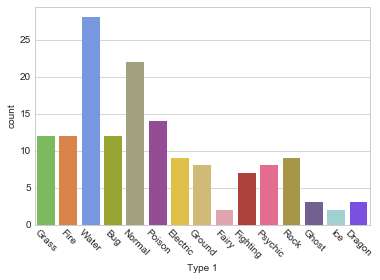

In [22]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(data=df, x='Type 1', palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Factor plot

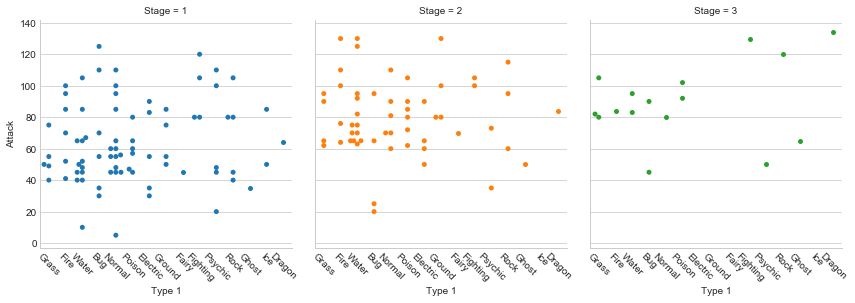

In [23]:
# Factor Plot
g = sns.factorplot(data=df, 
                   x='Type 1', 
                   y='Attack', 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Density Plot

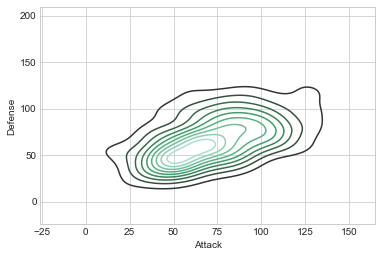

In [24]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot

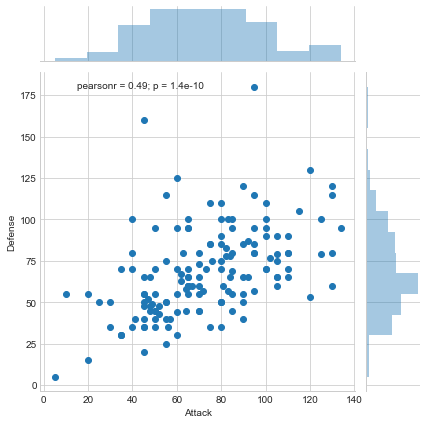

In [43]:
# Joint Distribution Plot
sns.jointplot(data=df, x='Attack', y='Defense')

The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All
https://elitedatascience.com/python-seaborn-tutorial